<a href="https://colab.research.google.com/github/chohu-boraaaa/Artificial-Intelligence/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [19]:
# 손글씨 데이터 불러오기
from tensorflow.keras import datasets
# 트레이닝 데이터 세트, 테스트 데이터 세트 나눠서 불러오기
(X_tn0,y_tn0),(X_te0,y_te0) = datasets.mnist.load_data()

In [20]:
# 원본 데이터 차원 확인
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_te0.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


- 트레이닝 피처 데이터 = 28행과 28열의 60000개 데이터로 구성
- 타깃 트레이닝 데이터 = 스칼라값 60000개로 이루어짐
- 트레이닝 피처 데이터 = 28행과 28열의 10000개 데이터로 구성
- 타깃 트레이닝 데이터 = 스칼라값 10000개로 이루어짐

<function matplotlib.pyplot.show>

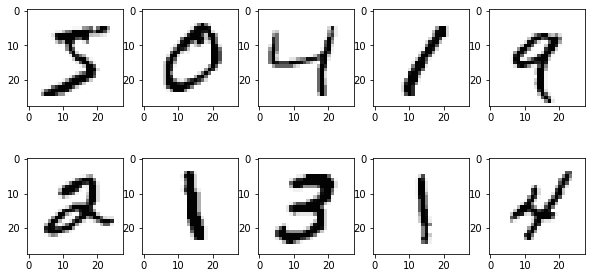

In [21]:
# 원본 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(2*5):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_tn0[i].reshape((28,28)), cmap='Greys')
plt.show

In [22]:
# 타깃 클래스 확인
set(y_tn0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

타깃 데이터의 종류를 확인하면 손글씨를 어떤 형태로 구분하는지, 총 몇 가지 숫자를 구분하는지 알 수 있음. 0~9까지 숫자를 구분

In [23]:
# 피처 데이터 스케일 조정
# 마지막에 채널 추가 (채널 1개)
X_tn_re = X_tn0.reshape(60000, 28, 28, 1)
X_tn = X_tn_re/255 # 최대값이 1이 되도록 조정해주면 딥러닝 성능 좋아짐
print(X_tn.shape)

(60000, 28, 28, 1)


In [24]:
X_te_re = X_te0.reshape(10000, 28, 28, 1)
X_te = X_te_re/255
print(X_te.shape)

(10000, 28, 28, 1)


In [25]:
# 타깃 데이터 원-핫 인코딩으로 표현
from tensorflow.keras.utils import to_categorical
y_tn = to_categorical(y_tn0)
y_te = to_categorical(y_te0)

In [26]:
from tensorflow.python.keras.layers.convolutional import Conv2DTranspose
# 합성곱 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout

n_class = len(set(y_tn0))

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) # 행렬 형태를 벡터 형태로 펼쳐주기
model.add(Dense(1024, activation='relu')) # 신경망 층 추가
model.add(Dropout(0.5)) 
model.add(Dense(n_class, activation='softmax')) # 최종출력층 추가
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 32)         

In [27]:
# 모형 컴파일
# 다중 분류 작업 : 손실함수를 categoricl_crossentropy로
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# 학습
hist = model.fit(X_tn, y_tn, epochs=3, batch_size=100)

Epoch 1/3
600/600 [==============================] - 70s 116ms/step - loss: 0.2284 - accuracy: 0.9290
Epoch 2/3
600/600 [==============================] - 53s 89ms/step - loss: 0.0751 - accuracy: 0.9758
Epoch 3/3
600/600 [==============================] - 54s 90ms/step - loss: 0.0571 - accuracy: 0.9824


In [29]:
# 평가
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0279 - accuracy: 0.9915
0.9914666414260864
313/313 [==============================] - 4s 11ms/step - loss: 0.0302 - accuracy: 0.9903
0.9902999997138977


In [31]:
# 테스트 데이터로 확인해보기
# 생성된 모델에 테스트 데이터 넣어 예측값 구하기
y_pred_hot = model.predict(X_te)

In [32]:
import numpy as np
# one-hot encoding 다시 숫자로 변환
y_pred = np.argmax(y_pred_hot, axis=1)
print(y_pred)

[7 2 1 ... 4 5 6]


두 번째 데이터 예측 값 :  2


<function matplotlib.pyplot.show>

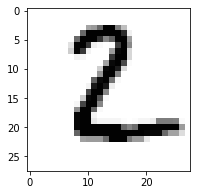

In [35]:
# 두 번째 데이터 잘 예측 되었는지 확인해보기
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.imshow(X_te0[1].reshape((28,28)), cmap='Greys')
print('두 번째 데이터 예측 값 : ', y_pred[1])
plt.show

In [36]:
# 오답 데이터 확인
diff = y_te0 - y_pred
diff_idx = []
y_len = len(y_te0)
for i in range(0, y_len):
  if(diff[i]!=0):
    diff_idx.append(i)

<function matplotlib.pyplot.show>

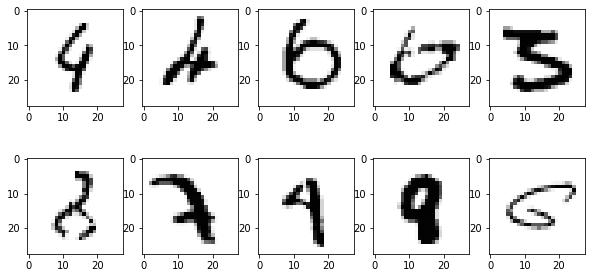

In [38]:
# 오답 데이터 시각화
plt.figure(figsize=(10,5))
for i in range(2*5):
  plt.subplot(2,5,i+1)
  raw_idx = diff_idx[i]
  plt.imshow(X_te0[raw_idx].reshape((28,28)), cmap='Greys')
plt.show

오답 데이터들은 육안으로 숫자를 구분하기 어려운 데이터들.